In [1]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\model_rf')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use('ggplot')

In [3]:
from utils.graphs import plot_numerical_data

# Read Dataset

In [8]:
X_train = pd.read_parquet(r'..\data\processed\feat_X_train.parquet')
y_train = pd.read_parquet(r'..\data\processed\feat_y_train.parquet')

In [9]:
df = pd.concat([X_train, y_train], axis=1)

In [10]:
print(f'Dataset rows and columns: {df.shape}')

Dataset rows and columns: (668, 19)


In [11]:
df

,numerical_pipe_con__Age,numerical_pipe_con__Fare,numerical_pipe_dis__SibSp,numerical_pipe_dis__Parch,numerical_pipe_dis__FamilySize,numerical_pipe_dis__IsAlone,categorical_pipe__Pclass_3,categorical_pipe__Pclass_2,categorical_pipe__Sex_male,categorical_pipe__Cabin_missing,categorical_pipe__Embarked_S,categorical_pipe__Embarked_C,categorical_pipe__Ticket_1p_3,categorical_pipe__Ticket_1p_2,categorical_pipe__Ticket_1p_Rare,categorical_pipe__Cabin_1p_missing,categorical_pipe__Embarked_mod_SQ,categorical_pipe__Embarked_mod_C,Survived
91,-0.701274,-0.521652,0.000,0.000000,0.0,1.0,1,0,1,1,1,0,1,0,0,1,1,0,0
114,-0.933379,-0.378308,0.000,0.000000,0.0,1.0,1,0,0,1,0,1,0,1,0,1,0,1,0
657,0.227144,-0.355697,0.125,0.166667,0.2,0.0,1,0,0,1,0,0,1,0,0,1,1,0,0
778,-0.082329,-0.524185,0.000,0.000000,0.0,1.0,1,0,1,1,0,0,1,0,0,1,1,0,0
146,-0.159697,-0.522920,0.000,0.000000,0.0,1.0,1,0,1,1,1,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,-0.082329,2.488153,0.125,0.000000,0.1,0.0,0,0,0,0,0,1,0,0,1,0,0,1,1
488,0.072408,-0.517402,0.000,0.000000,0.0,1.0,1,0,1,1,1,0,0,0,1,1,1,0,0
40,0.846090,-0.486472,0.125,0.000000,0.1,0.0,1,0,0,1,1,0,0,0,1,1,1,0,0
742,-0.623906,5.002808,0.250,0.333333,0.4,0.0,0,0,0,0,0,1,0,0,1,0,0,1,1


In [12]:
num_var = df.select_dtypes(include=['number']).columns
num_var

Index(['numerical_pipe_con__Age', 'numerical_pipe_con__Fare',
       'numerical_pipe_dis__SibSp', 'numerical_pipe_dis__Parch',
       'numerical_pipe_dis__FamilySize', 'numerical_pipe_dis__IsAlone',
       'categorical_pipe__Pclass_3', 'categorical_pipe__Pclass_2',
       'categorical_pipe__Sex_male', 'categorical_pipe__Cabin_missing',
       'categorical_pipe__Embarked_S', 'categorical_pipe__Embarked_C',
       'categorical_pipe__Ticket_1p_3', 'categorical_pipe__Ticket_1p_2',
       'categorical_pipe__Ticket_1p_Rare',
       'categorical_pipe__Cabin_1p_missing',
       'categorical_pipe__Embarked_mod_SQ', 'categorical_pipe__Embarked_mod_C',
       'Survived'],
      dtype='object')

# Check target - Y_true

# Exploratory Analisys

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 91 to 595
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   numerical_pipe_con__Age             668 non-null    float64
 1   numerical_pipe_con__Fare            668 non-null    float64
 2   numerical_pipe_dis__SibSp           668 non-null    float64
 3   numerical_pipe_dis__Parch           668 non-null    float64
 4   numerical_pipe_dis__FamilySize      668 non-null    float64
 5   numerical_pipe_dis__IsAlone         668 non-null    float64
 6   categorical_pipe__Pclass_3          668 non-null    int32  
 7   categorical_pipe__Pclass_2          668 non-null    int32  
 8   categorical_pipe__Sex_male          668 non-null    int32  
 9   categorical_pipe__Cabin_missing     668 non-null    int32  
 10  categorical_pipe__Embarked_S        668 non-null    int32  
 11  categorical_pipe__Embarked_C        668 non-null 

# Check NA values

<Axes: >

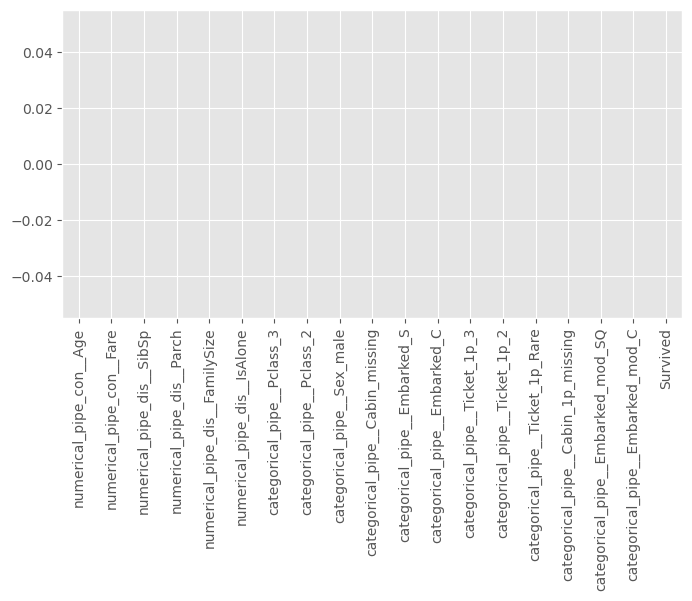

In [14]:
df.isna().mean().plot.bar(figsize=(8,4))

# Check Cardinality

In [15]:
for col in num_var:
    print('Numero de labels por variável na coluna: ' + col + ' ' + str(df[col].nunique()))

Numero de labels por variável na coluna: numerical_pipe_con__Age 77
Numero de labels por variável na coluna: numerical_pipe_con__Fare 218
Numero de labels por variável na coluna: numerical_pipe_dis__SibSp 7
Numero de labels por variável na coluna: numerical_pipe_dis__Parch 7
Numero de labels por variável na coluna: numerical_pipe_dis__FamilySize 9
Numero de labels por variável na coluna: numerical_pipe_dis__IsAlone 2
Numero de labels por variável na coluna: categorical_pipe__Pclass_3 2
Numero de labels por variável na coluna: categorical_pipe__Pclass_2 2
Numero de labels por variável na coluna: categorical_pipe__Sex_male 2
Numero de labels por variável na coluna: categorical_pipe__Cabin_missing 2
Numero de labels por variável na coluna: categorical_pipe__Embarked_S 2
Numero de labels por variável na coluna: categorical_pipe__Embarked_C 2
Numero de labels por variável na coluna: categorical_pipe__Ticket_1p_3 2
Numero de labels por variável na coluna: categorical_pipe__Ticket_1p_2 2
Nume

# Graphs

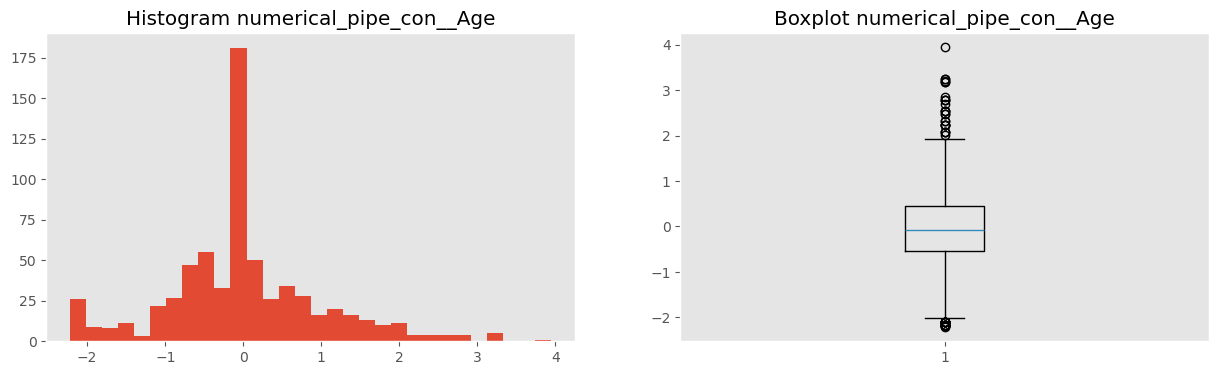

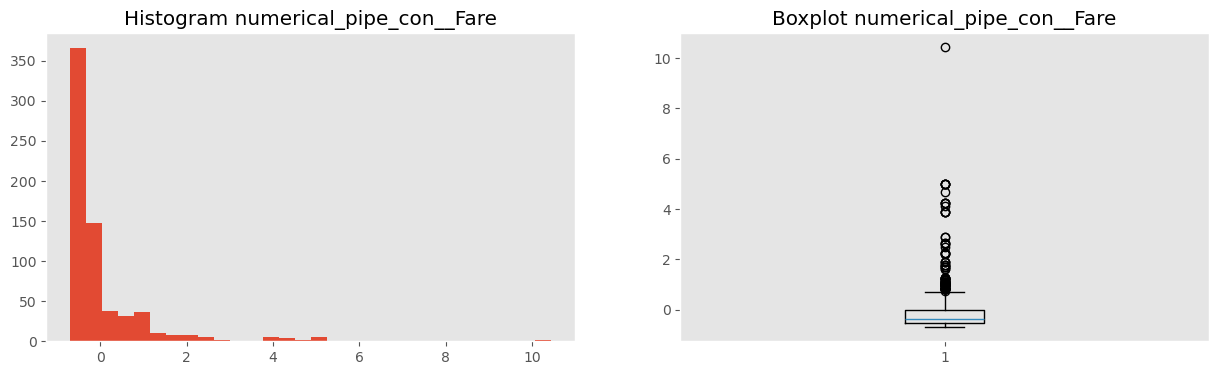

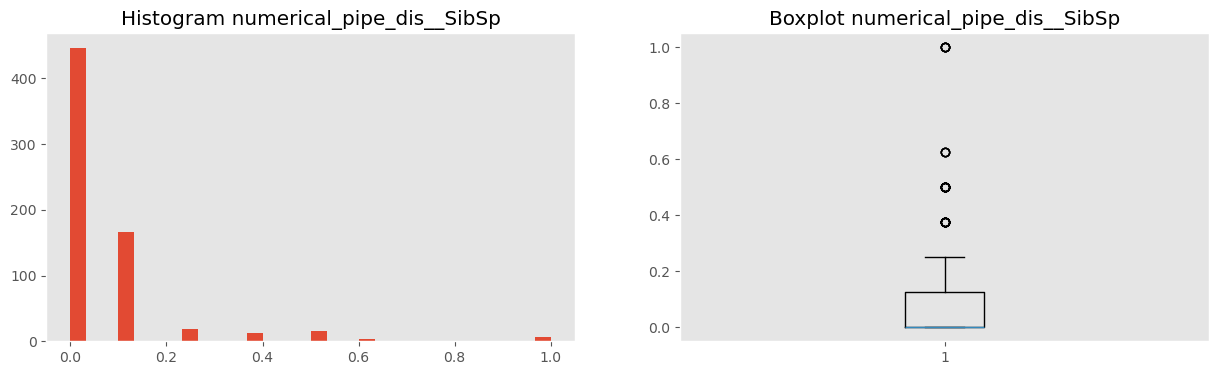

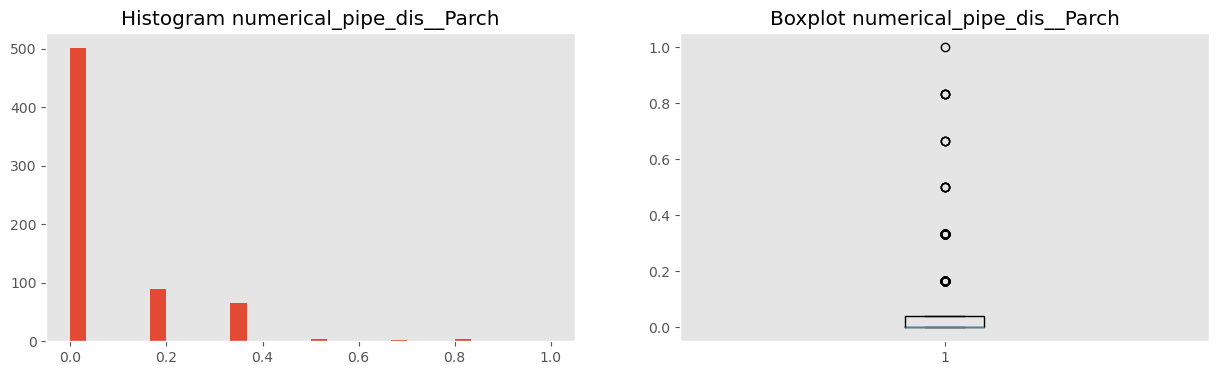

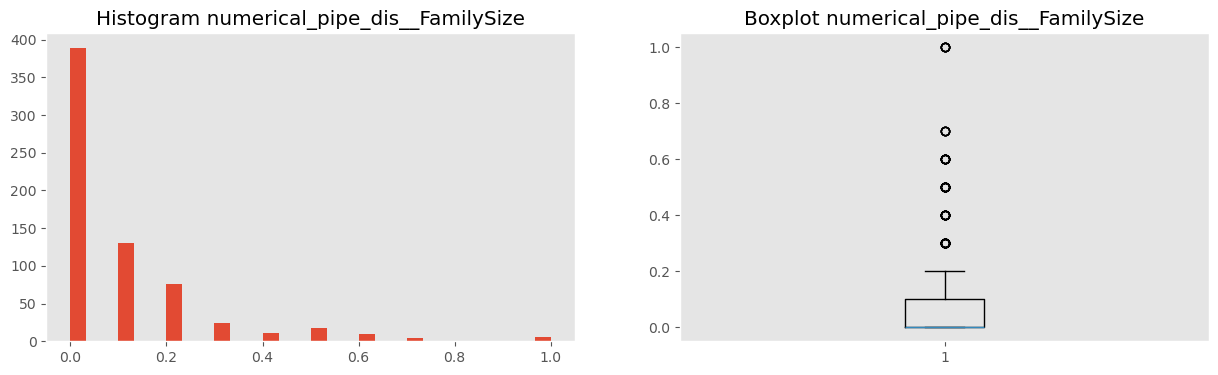

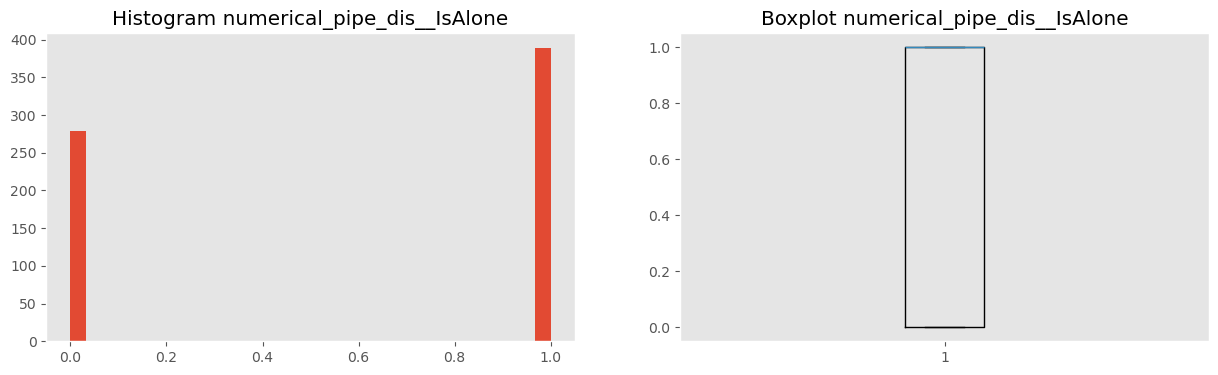

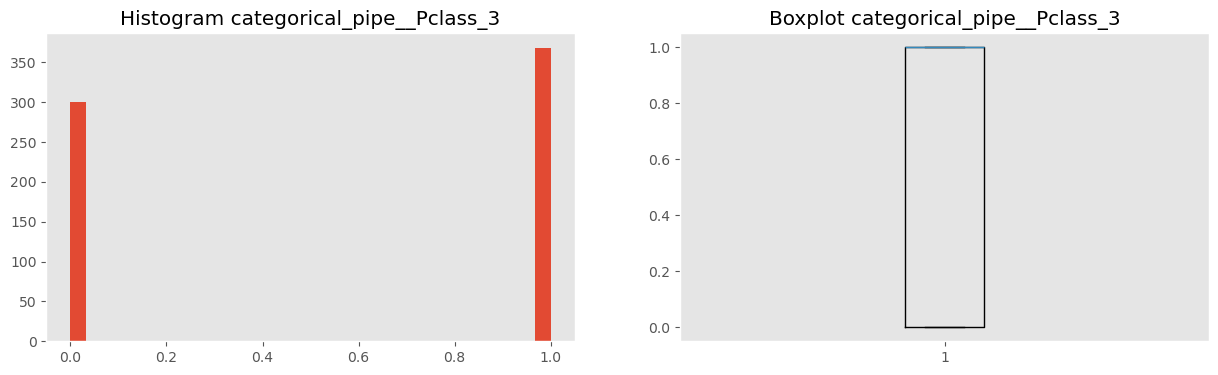

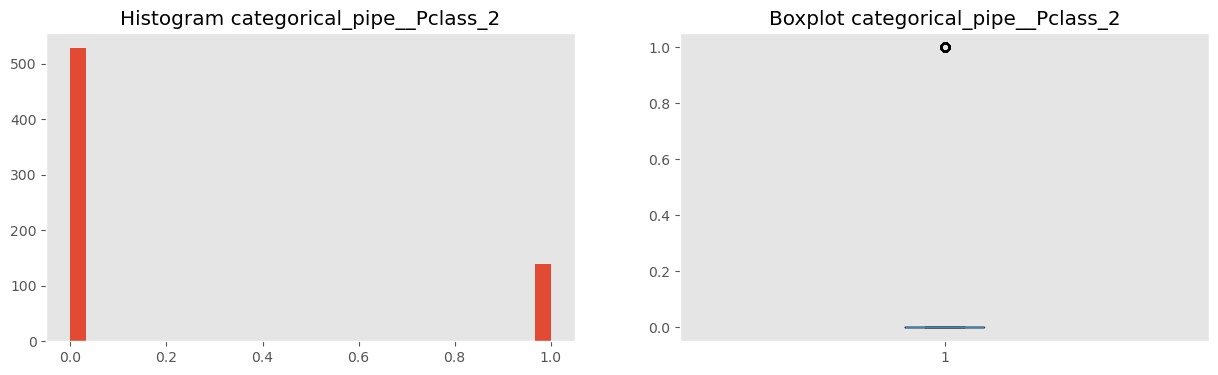

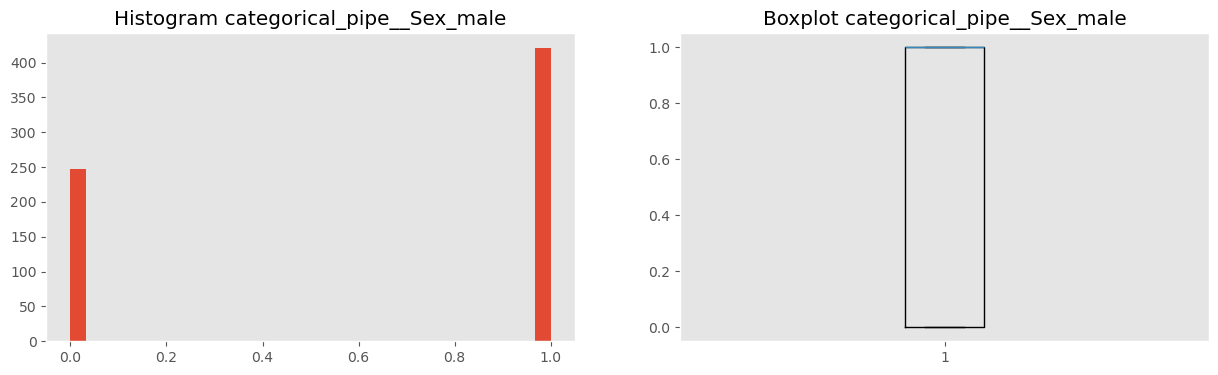

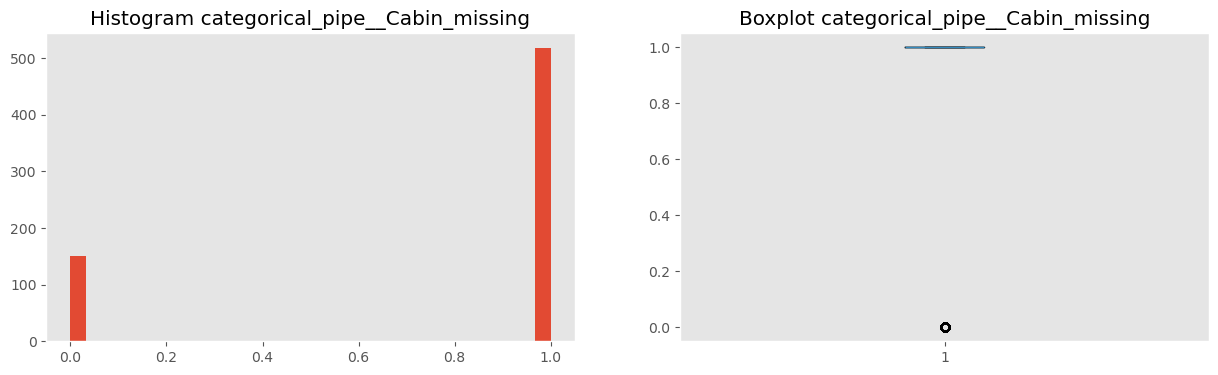

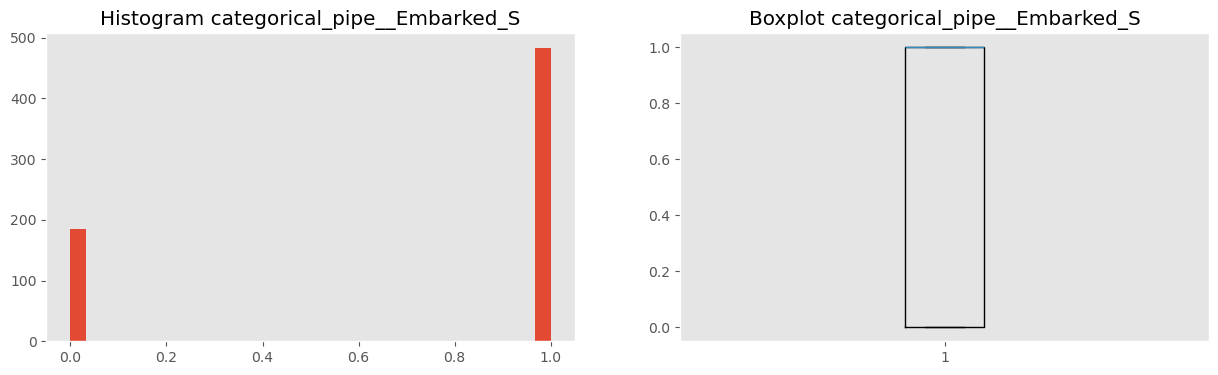

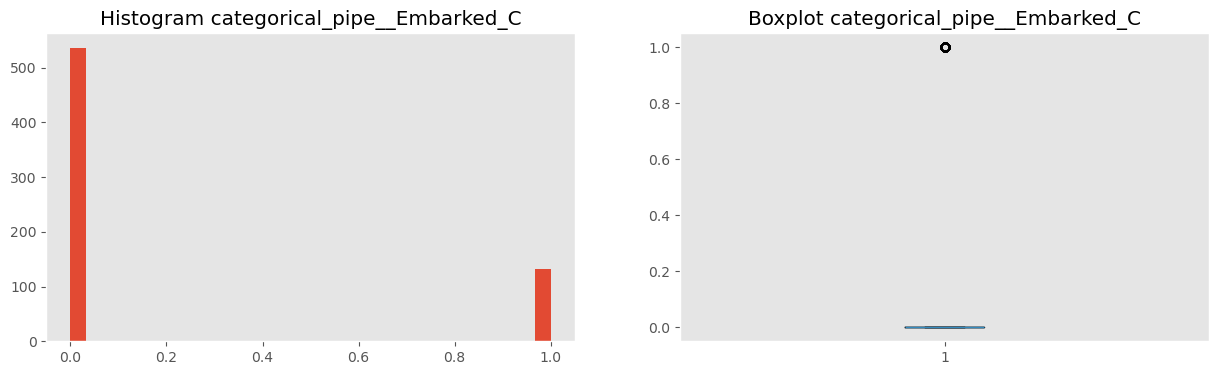

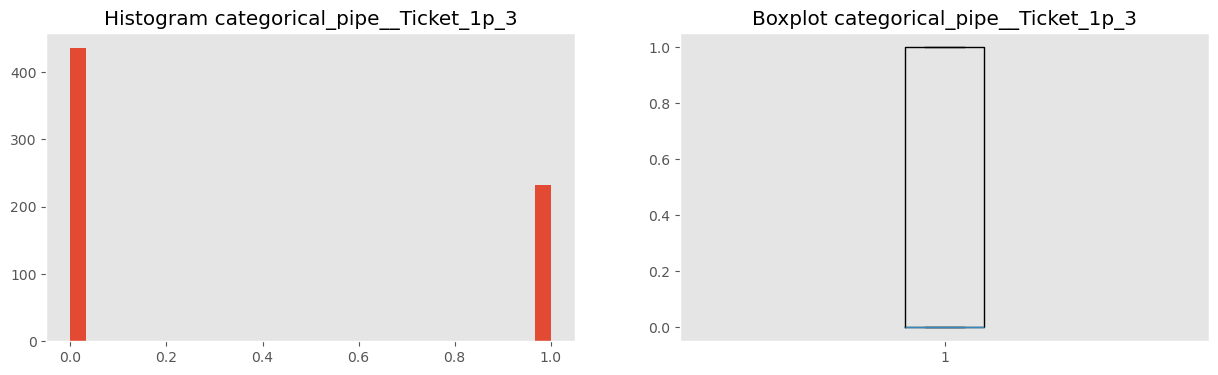

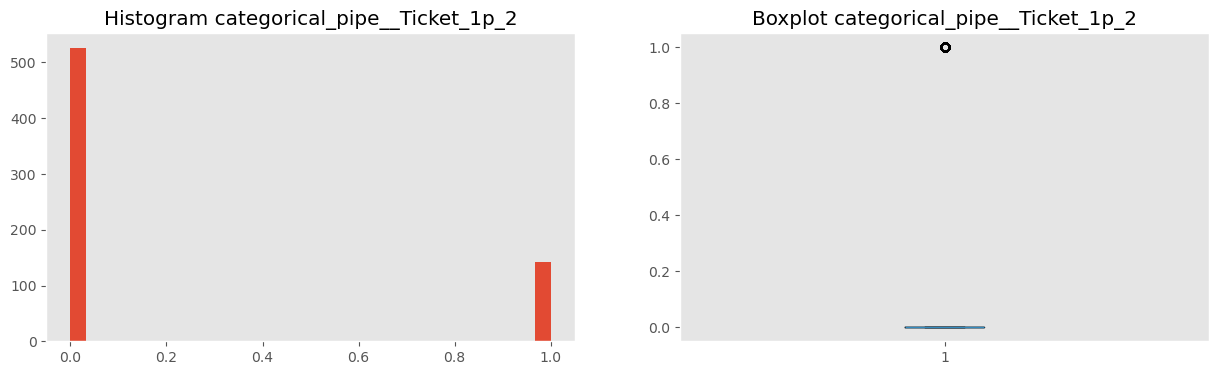

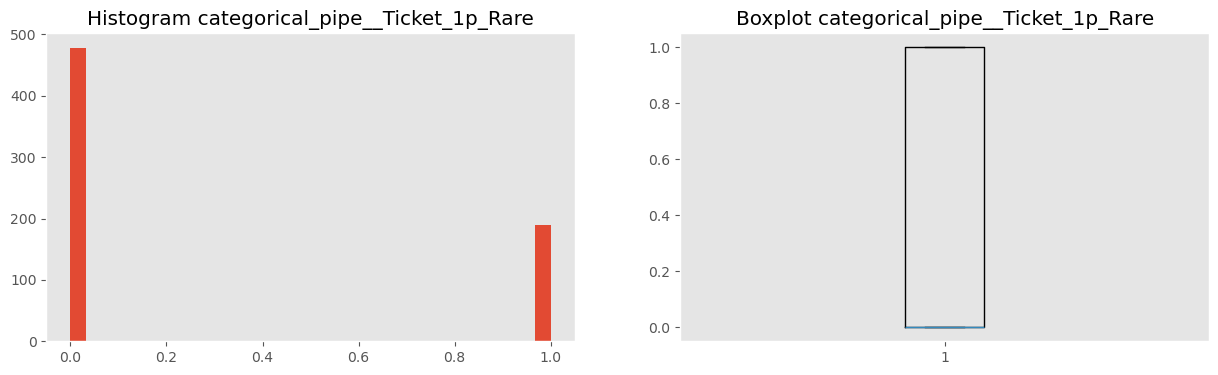

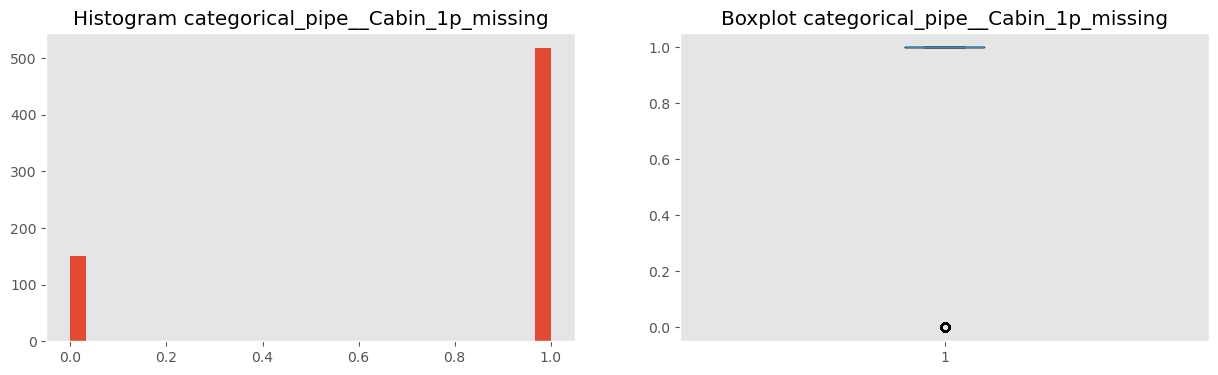

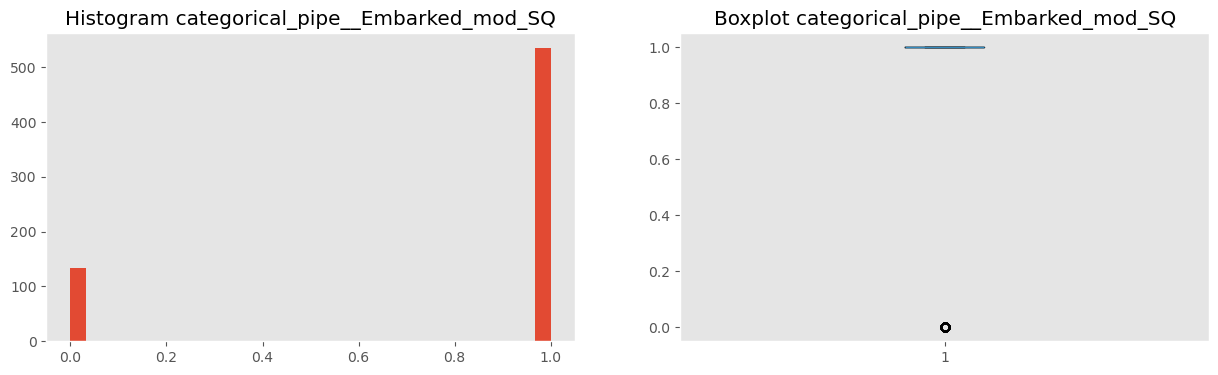

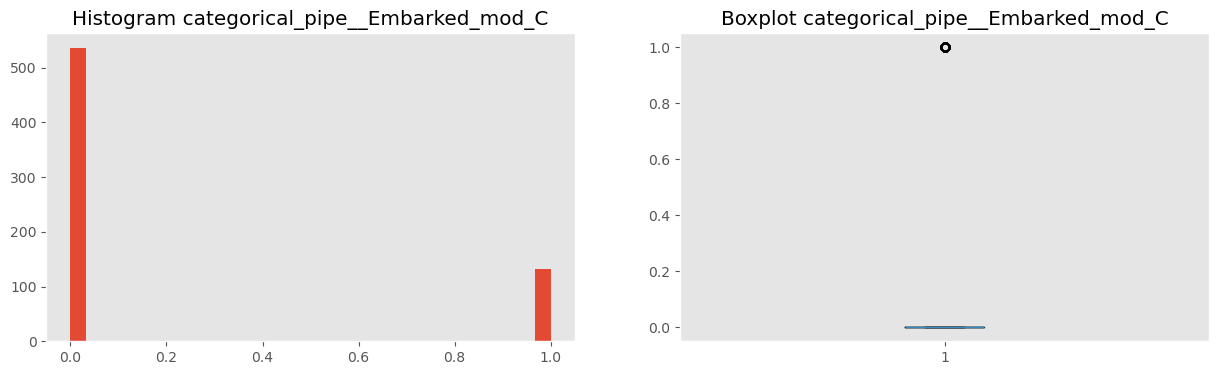

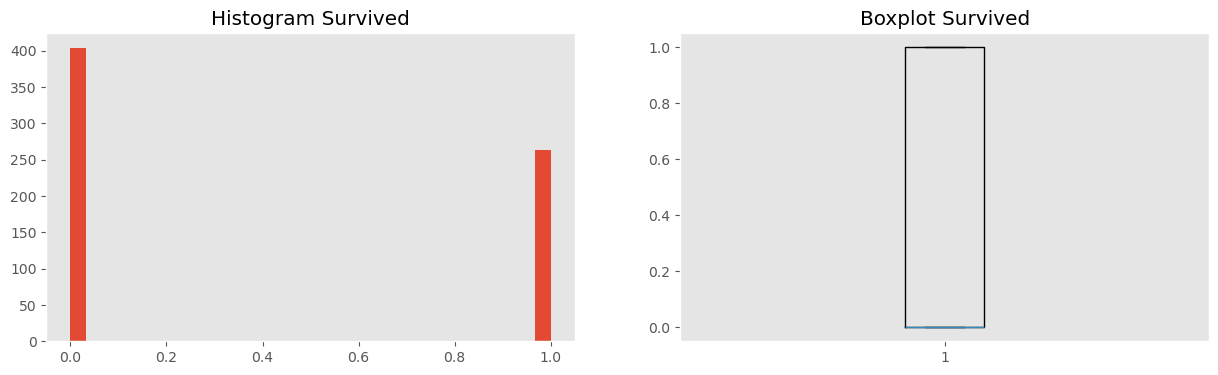

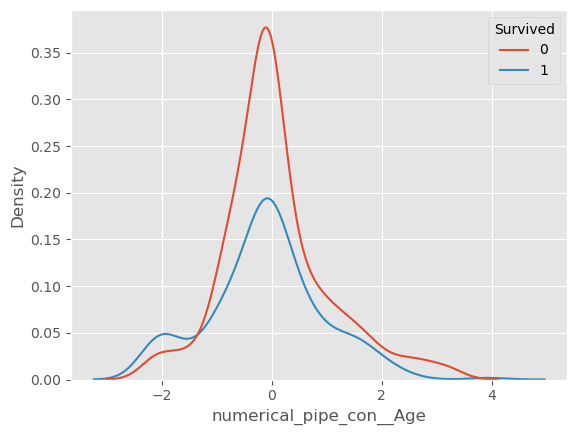

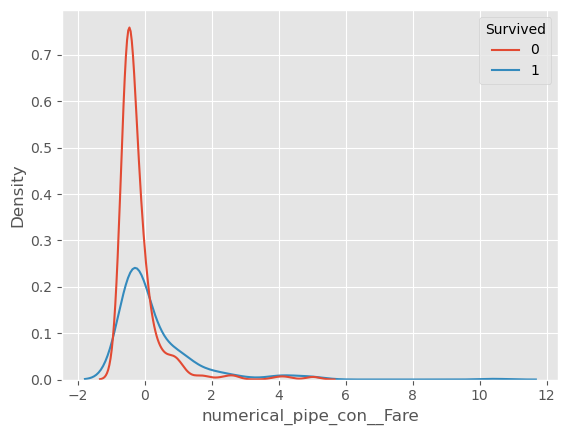

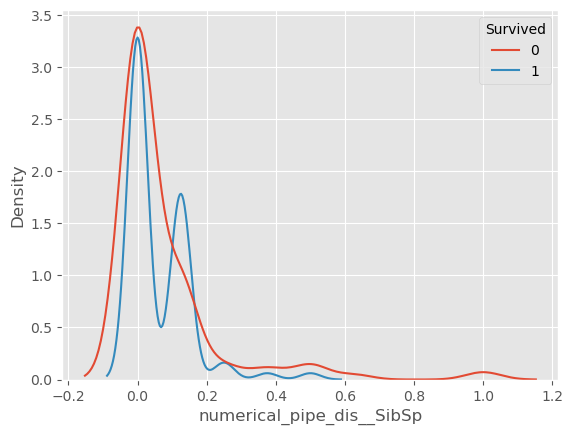

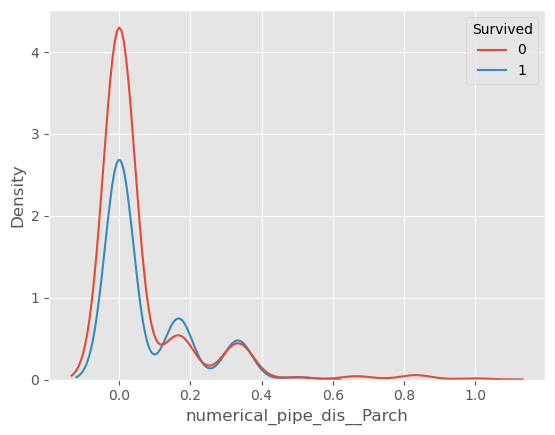

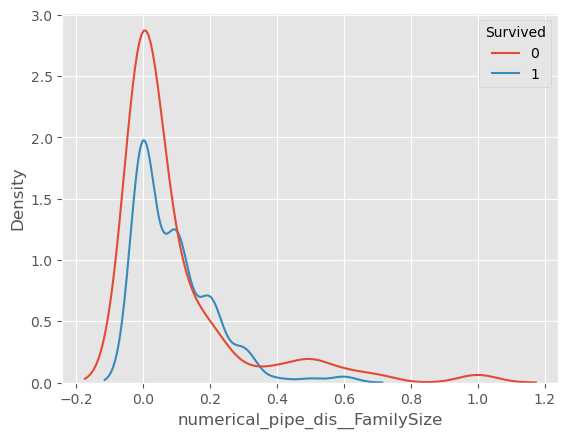

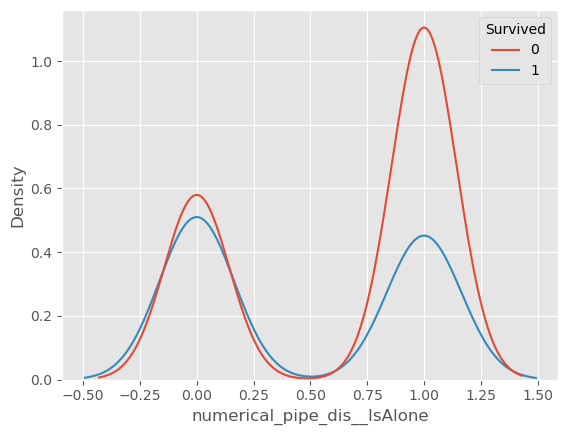

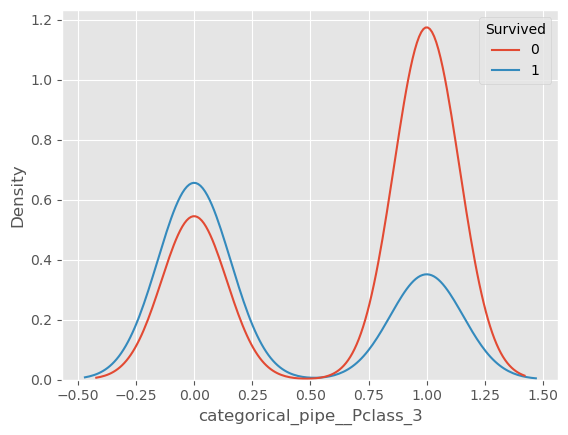

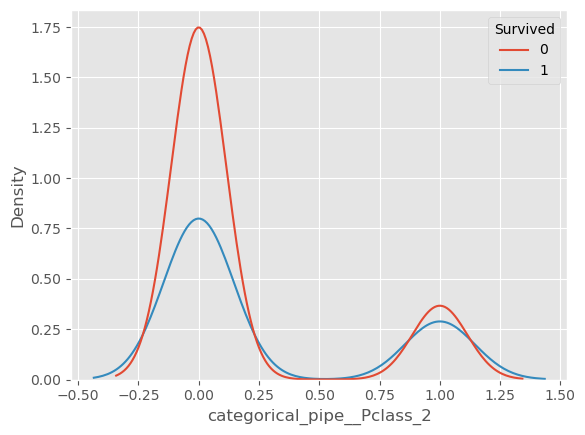

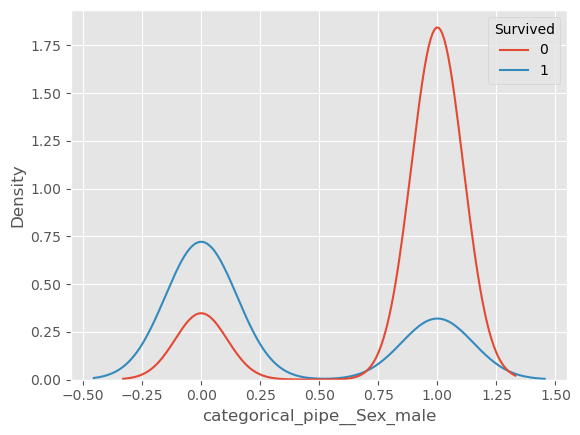

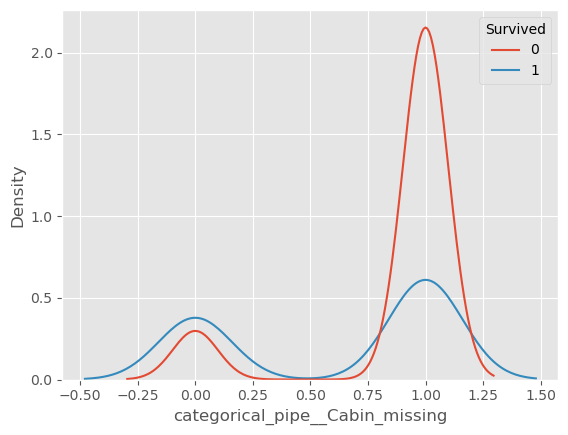

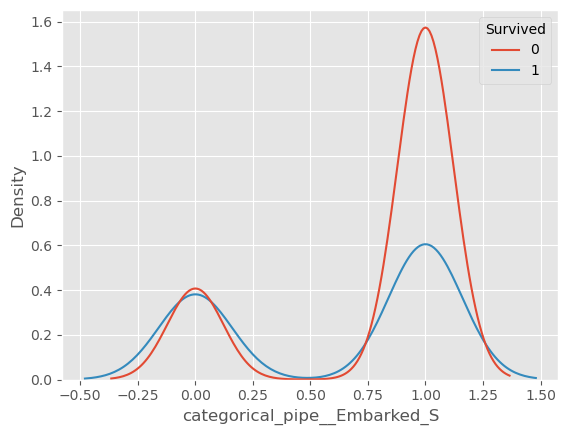

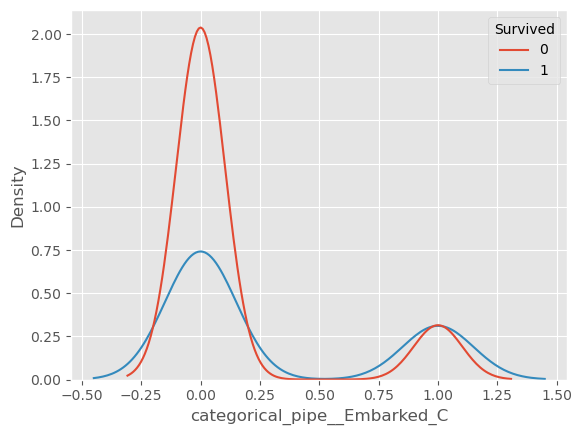

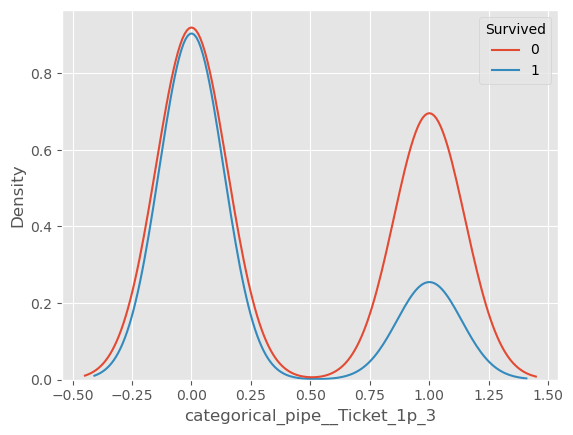

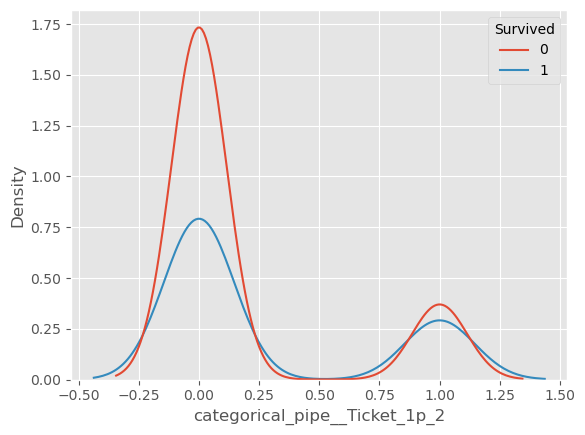

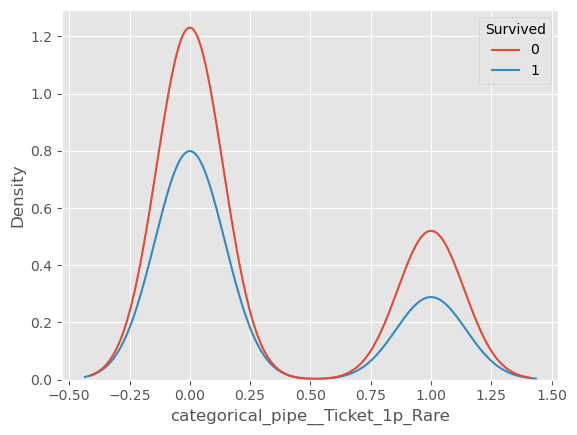

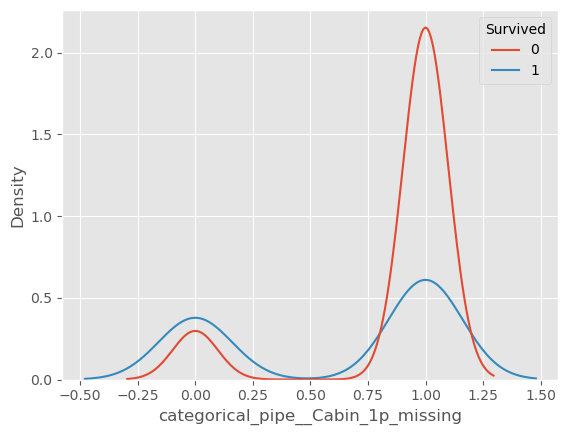

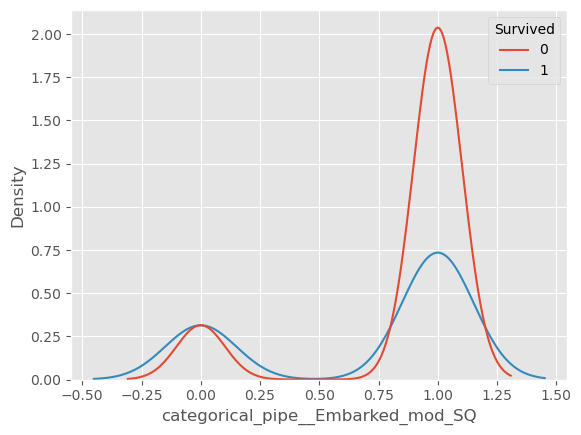

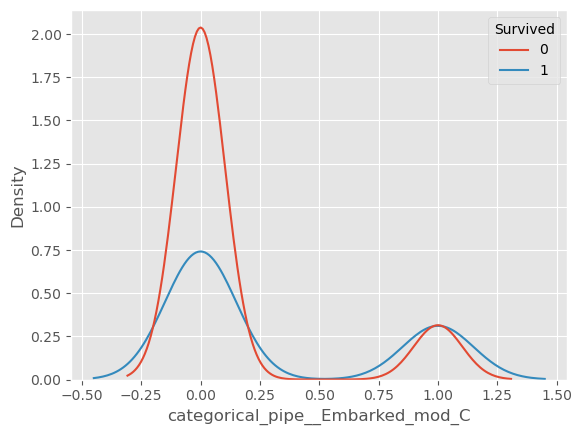

C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\model_rf\utils\graphs.py:61: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


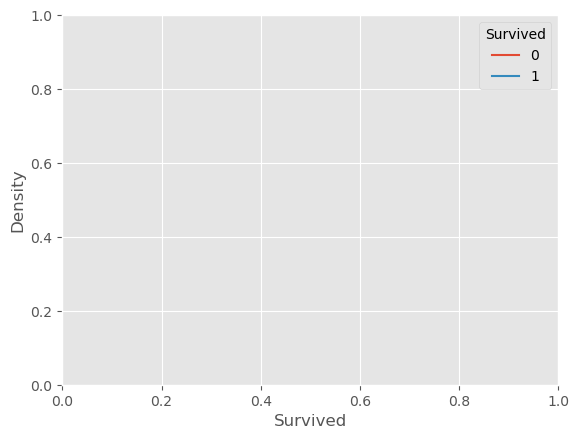

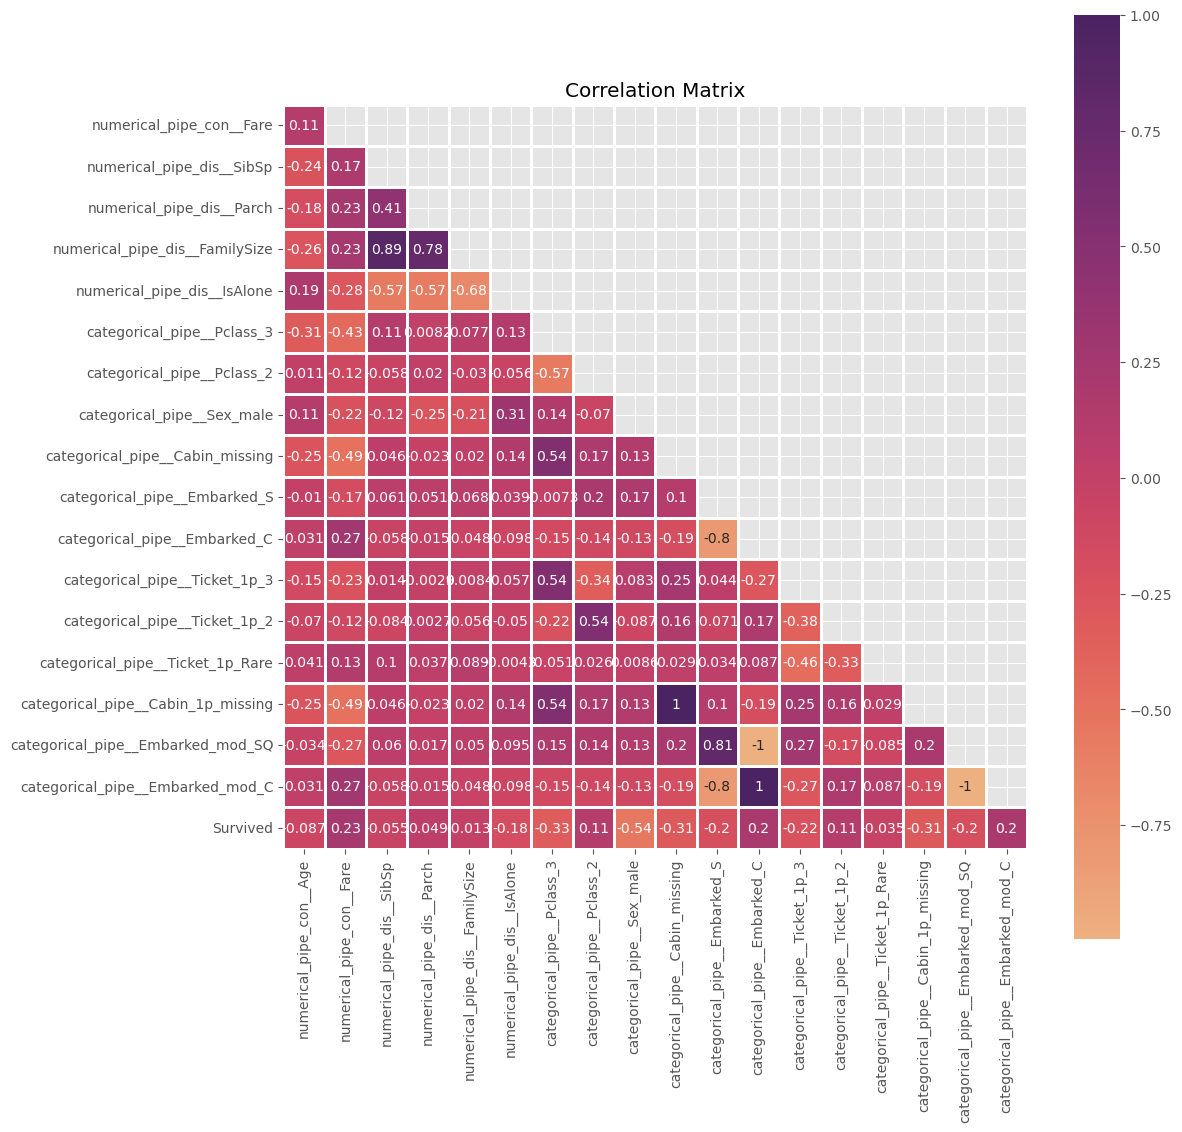

In [16]:
plot_numerical_data(df, target="Survived")

In [ ]:
df['Age_bin'] = pd.cut(df['Age'], 
                       bins=[0, 14, 17, 30, 65, 80], 
                       labels=[i for i in range(5)])

In [ ]:
sns.countplot(df,
            x='Survived',
            hue='Age_bin')